In [112]:
# import csv

# DIR='../Data/'
# f = open(DIR+'subwaytime.csv', encoding='euc_kr')
# data = csv.reader(f)
# header = next(data)
# print(header)
# i = 0
# for row in data:
#     print(row)
#     if i >5:
#         break
#     i += 1
# f.close()

In [113]:
# 1. 지하철 각 노선별 최대 하차 인원을 막대그래프로 표시하고, 하차인원 출력
# n 출근 시간대: 07:00~08:59
# n 사용 파일: subwaytime.csv 또는 subwaytime.xls
# - 07:00~07:59 하차: index[11], 08:00~08:59 하차: index [13]
# n 각 지하철 노선별 가장 많이 내리는 지하철 역 분석
# Ø 1 호선, 2 호선, 3 호선, 4 호선, 5 호선, 6 호선, 7 호선
# n 하차 인원은 1,000 단위로 콤마를 찍어서 구분할 것
# n 6 개의 지하철 역을 막대 그래프로 표시
# n Bar chart 의 x 축은 (노선 + 지하철 역 이름)을 표시하고, y 축은 인원수를 표시
# n 반드시 다른 운영체제에서도 동작할 수 있도록 platform 모듈을 사용하여
# 운영체제를 구분하여 한글 폰트 지정할 것

In [133]:
import pandas as pd
DIR='../Data/'
FILE=DIR+'subwaytime.csv'
subwayDF=pd.read_csv(FILE, encoding='cp949', header=[0,1])

In [134]:
subwayDF.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5_level_0,05:00:00~05:59:59,Unnamed: 7_level_0,06:00:00~06:59:59,Unnamed: 9_level_0,...,23:00:00~23:59:59,Unnamed: 43_level_0,00:00:00~00:59:59,Unnamed: 45_level_0,01:00:00~01:59:59,Unnamed: 47_level_0,02:00:00~02:59:59,Unnamed: 49_level_0,03:00:00~03:59:59,Unnamed: 51_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
0,Jun-22,1호선,150,서울역,646,24,8433,7694,12608,46963,...,20385,15480,158,1332,1,4,0,1,0,0
1,Jun-22,1호선,151,시청,271,7,3133,4802,3321,23621,...,9254,2938,72,422,0,2,0,0,0,0
2,Jun-22,1호선,152,종각,91,9,4007,3960,3682,22533,...,27781,3590,315,394,0,1,0,0,0,0
3,Jun-22,1호선,153,종로3가,190,12,3882,3261,3570,14038,...,17170,4119,310,843,3,3,0,0,0,0
4,Jun-22,1호선,154,종로5가,34,0,1730,3909,2986,16406,...,6208,2628,98,668,0,0,0,0,0,0


In [135]:
subwayDF.columns

MultiIndex([(                '사용월', 'Unnamed: 0_level_1'),
            (                '호선명', 'Unnamed: 1_level_1'),
            (                '역ID', 'Unnamed: 2_level_1'),
            (               '지하철역', 'Unnamed: 3_level_1'),
            (  '04:00:00~04:59:59',                 '승차'),
            ( 'Unnamed: 5_level_0',                 '하차'),
            (  '05:00:00~05:59:59',                 '승차'),
            ( 'Unnamed: 7_level_0',                 '하차'),
            (  '06:00:00~06:59:59',                 '승차'),
            ( 'Unnamed: 9_level_0',                 '하차'),
            (  '07:00:00~07:59:59',                 '승차'),
            ('Unnamed: 11_level_0',                 '하차'),
            (  '08:00:00~08:59:59',                 '승차'),
            ('Unnamed: 13_level_0',                 '하차'),
            (  '09:00:00~09:59:59',                 '승차'),
            ('Unnamed: 15_level_0',                 '하차'),
            (  '10:00:00~10:59:59',                 '승차'

In [136]:
subwayDF1=subwayDF.iloc[:,[1,3,11,13]]
subwayDF1

,호선명,지하철역,Unnamed: 11_level_0,Unnamed: 13_level_0
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,100397,201687
1,1호선,시청,62427,179710
2,1호선,종각,95376,235160
3,1호선,종로3가,25469,68699
4,1호선,종로5가,41304,96113
...,...,...,...,...
610,신림선,당곡,1981,5511
611,신림선,신림,1075,1704
612,신림선,서원,977,1319


In [142]:
subwayDF1.columns=['호선명','지하철역','7시','8시']
subwayDF1

,호선명,지하철역,7시,8시
0,1호선,서울역,100397,201687
1,1호선,시청,62427,179710
2,1호선,종각,95376,235160
3,1호선,종로3가,25469,68699
4,1호선,종로5가,41304,96113
...,...,...,...,...
610,신림선,당곡,1981,5511
611,신림선,신림,1075,1704
612,신림선,서원,977,1319
613,신림선,서울대벤처타운,3834,6306


In [138]:
subwayDF1['7시']

0      100397
1       62427
2       95376
3       25469
4       41304
        ...  
610      1981
611      1075
612       977
613      3834
614      3938
Name: 7시, Length: 615, dtype: int64

In [139]:
subwayDF1[subwayDF1['호선명'] == '1호선']

,호선명,지하철역,7시,8시
0,1호선,서울역,100397,201687
1,1호선,시청,62427,179710
2,1호선,종각,95376,235160
3,1호선,종로3가,25469,68699
4,1호선,종로5가,41304,96113
5,1호선,동대문,12675,22464
6,1호선,신설동,23149,56781
7,1호선,제기동,19135,39898
8,1호선,청량리(서울시립대입구),17531,35718
9,1호선,동묘앞,9730,22640


In [121]:
subwayDF1['7시+8시']=subwayDF1['7시']+subwayDF1['8시']
subwayDF1

C:\Users\User\AppData\Local\Temp\ipykernel_14524\3425440559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subwayDF1['7시+8시']=subwayDF1['7시']+subwayDF1['8시']


,호선명,지하철역,7시,8시,7시+8시
0,1호선,서울역,100397,201687,302084
1,1호선,시청,62427,179710,242137
2,1호선,종각,95376,235160,330536
3,1호선,종로3가,25469,68699,94168
4,1호선,종로5가,41304,96113,137417
...,...,...,...,...,...
610,신림선,당곡,1981,5511,7492
611,신림선,신림,1075,1704,2779
612,신림선,서원,977,1319,2296
613,신림선,서울대벤처타운,3834,6306,10140


In [122]:
station=[]
count=[]
label=[]

for i in range(1,8):
    sub1=subwayDF1[subwayDF1['호선명'] == str(i)+'호선'].sort_values('7시+8시', ascending=False)
    station.append((sub1.iloc[0])[1])
    count.append((sub1.iloc[0])[4])
    label.append(str(i)+'호선:'+station[i-1])
    print(f'출근 시간대 {i}호선 최대 하차역은 {station[i-1]}역이고 하차인원은 {count[i-1]}명 입니다.')

print(station)
print(count)
print(label)

출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330536명 입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479969명 입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331279명 입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208776명 입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352602명 입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134342명 입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486420명 입니다.
['종각', '역삼', '양재(서초구청)', '충무로', '여의도', '공덕', '가산디지털단지']
[330536, 479969, 331279, 208776, 352602, 134342, 486420]
['1호선:종각', '2호선:역삼', '3호선:양재(서초구청)', '4호선:충무로', '5호선:여의도', '6호선:공덕', '7호선:가산디지털단지']


In [123]:
station=[]
count=[]
label=[]

for i in range(1,8):
    sub1=subwayDF1[subwayDF1['호선명'] == str(i)+'호선'].sort_values('7시+8시', ascending=False)
    
    # 빈 리스트 채우기
    station.append((sub1.iloc[0])[1])
    count.append((sub1.iloc[0])[4])
    label.append(str(i)+'호선:'+station[i-1])
    
    print('출근 시간대 {0}호선 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.
          format(i, station[i-1] , count[i-1]))

출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명 입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명 입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명 입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명 입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명 입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명 입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명 입니다.


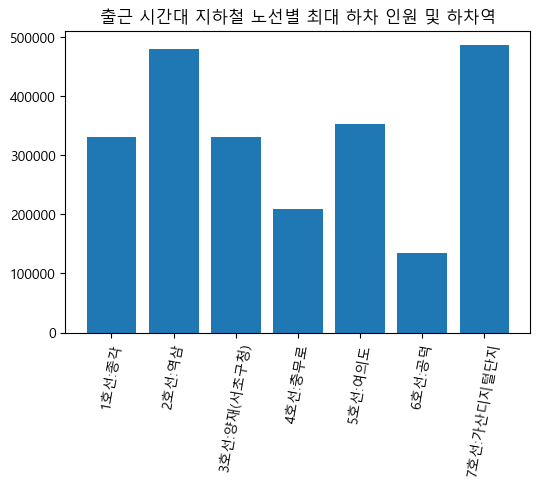

In [126]:
import platform
import matplotlib.pyplot as plt
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'AppleGothic')
plt.figure(dpi=100)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.bar(label,count)
plt.xticks(rotation=80)
plt.show()

In [ ]:
# sub1=subwayDF1[subwayDF1['호선명']=='1호선'].sort_values('7시+8시', ascending=False)
# sub2=subwayDF1[subwayDF1['호선명']=='2호선'].sort_values('7시+8시', ascending=False)
# sub3=subwayDF1[subwayDF1['호선명']=='3호선'].sort_values('7시+8시', ascending=False)
# sub4=subwayDF1[subwayDF1['호선명']=='4호선'].sort_values('7시+8시', ascending=False)
# sub5=subwayDF1[subwayDF1['호선명']=='5호선'].sort_values('7시+8시', ascending=False)
# sub6=subwayDF1[subwayDF1['호선명']=='6호선'].sort_values('7시+8시', ascending=False)
# sub7=subwayDF1[subwayDF1['호선명']=='7호선'].sort_values('7시+8시', ascending=False)

In [ ]:
# sub1.head(3)

In [ ]:
# print('출근 시간대 {0} 최대 하차역은 {1}이고 하차인원은 {2:,}명 입니다.'.format(sub1['호선명'][0], sub1['지하철역'][2], sub1['7시+8시'][0]))

In [127]:
sub1.iloc[0]

호선명          7호선
지하철역     가산디지털단지
7시        117899
8시        368521
7시+8시     486420
Name: 512, dtype: object

In [128]:
sub1.iloc[0]

호선명          7호선
지하철역     가산디지털단지
7시        117899
8시        368521
7시+8시     486420
Name: 512, dtype: object

In [129]:
subwayDF1[subwayDF1['호선명'] == '2호선'].sort_values('7시+8시', ascending=False)

,호선명,지하철역,7시,8시,7시+8시
30,2호선,역삼,138583,341386,479969
28,2호선,삼성(무역센터),129653,323820,453473
31,2호선,강남,147542,305615,453157
11,2호선,을지로입구,116114,297445,413559
29,2호선,선릉,109061,276287,385348
20,2호선,성수,74526,256344,330870
41,2호선,구로디지털단지,84090,245720,329810
10,2호선,시청,60164,198143,258307
25,2호선,잠실(송파구청),72762,160573,233335
12,2호선,을지로3가,65511,162157,227668
